In [1]:
from disk_utils_jax import jax_disk_model_hg, jax_disk_model_hg2
from disk_utils_orig import single_hg_disk_model_original, single_hg2_disk_model_original
import jax.numpy as jnp
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
inclination = 45 #In degrees
position_angle = 30 #In Degrees
alpha_in = 7. #The inner power law
alpha_out = -7. #The outer power law
cent = [70,70] #The center pixels
gs_ws = jnp.array([0.8,-0.2,0,0.75,0.25,0.]) #Here we have 3 Henyey-Greenstein functions with g parameters of 1, -1, and 0. The weights are 0.75, 0.25, and 0 respectively. 
flux_scaling = 1e6

#The disk size
sma = 400. #This is the semi-major axis of the model in astronomical units. 
#To get this in pixels, divide by the distance to the star, to get it in arcseconds. To get it in pixeks, divide by the pixel scale.

In [3]:
# Original code
start = datetime.now()
disk, disk_image = single_hg2_disk_model_original(inclination, position_angle, alpha_in, alpha_out, sma, cent, gs_ws, flux_scaling)
end = datetime.now()
print(end-start)

0:00:00.152679


In [4]:
# Object Jax code
start = datetime.now()
disk_image_jit = jax_disk_model_hg2(inclination, position_angle, alpha_in, alpha_out, sma, cent, gs_ws, flux_scaling)
end = datetime.now()
print(end-start)

0:00:02.512135


In [5]:
# Object Jax code
start = datetime.now()
disk_image_jit = jax_disk_model_hg2(inclination, position_angle, alpha_in, alpha_out, sma, cent, gs_ws, flux_scaling)
end = datetime.now()
print(end-start)

0:00:00.127473


Text(0.5, 1.0, 'Jax Code (Right)')

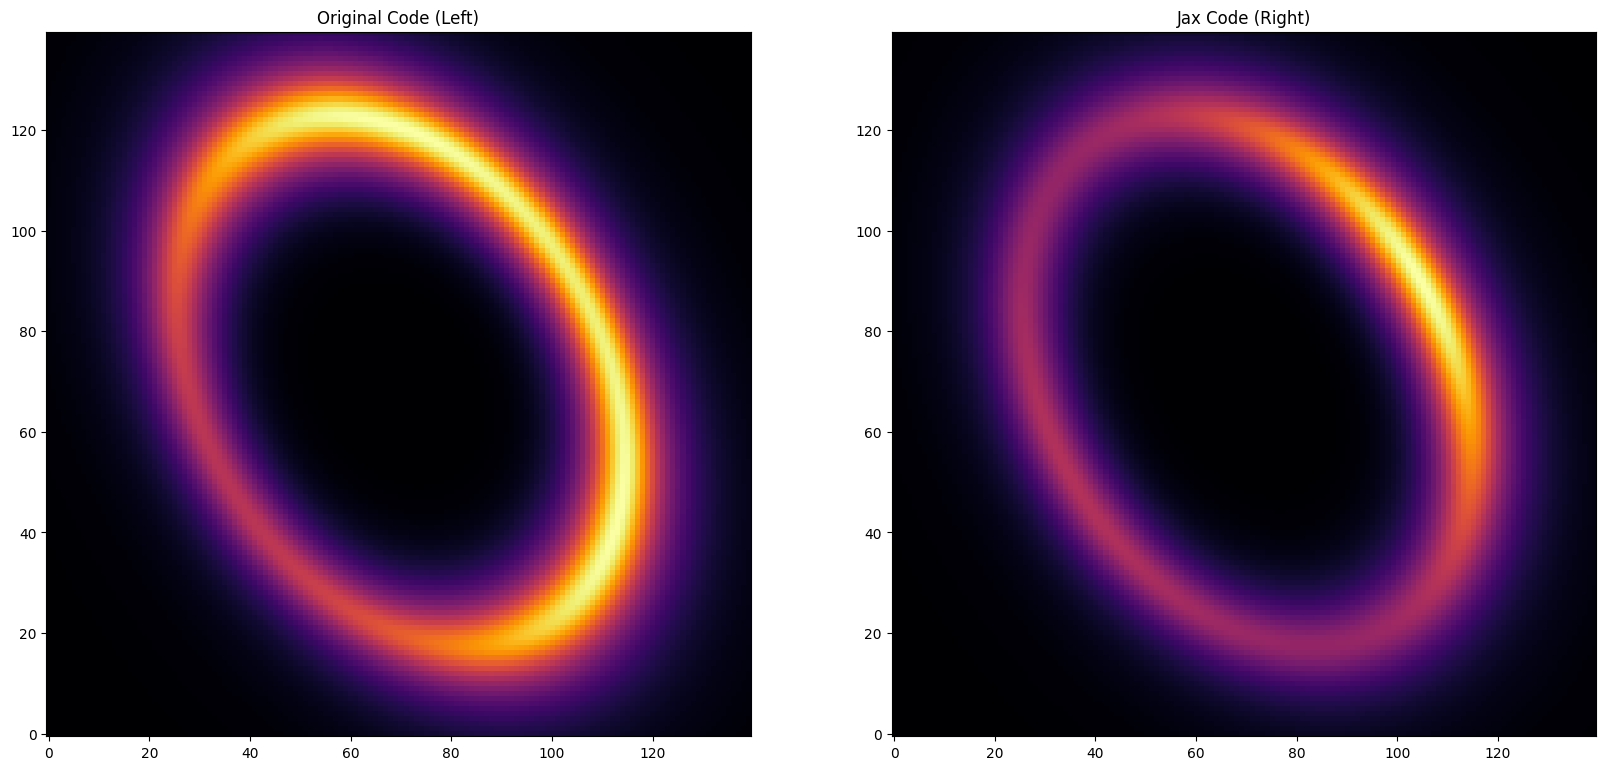

In [6]:
fig, axes = plt.subplots(1,2, figsize=(20,10))

axes[0].imshow(disk_image, origin='lower', cmap='inferno')
axes[0].set_title("Original Code (Left)")

axes[1].imshow(disk_image_jit, origin='lower', cmap='inferno')
axes[1].set_title("Jax Code (Right)")